In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def metadata(ejex, ejey):
    # plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return

In [3]:
biomasa = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Biomasa.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Biomasa.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [4]:
resumen(biomasa)

Forma:
 (7, 10) 

 Columnas:
 Index(['Fecha', 'Sitio 1 S', 'Sitio 2 S', 'Sitio 3 S', 'Sitio 1 V',
       'Sitio 2 V', 'Sitio 3 V', 'Sitio 1 T', 'Sitio 2 T', 'Sitio 3 T'],
      dtype='object') 

 Tipos:
 Fecha         object
Sitio 1 S    float64
Sitio 2 S    float64
Sitio 3 S    float64
Sitio 1 V    float64
Sitio 2 V    float64
Sitio 3 V    float64
Sitio 1 T    float64
Sitio 2 T    float64
Sitio 3 T    float64
dtype: object 

 Datos nulos:
 Fecha        0
Sitio 1 S    0
Sitio 2 S    0
Sitio 3 S    0
Sitio 1 V    0
Sitio 2 V    0
Sitio 3 V    0
Sitio 1 T    0
Sitio 2 T    0
Sitio 3 T    0
dtype: int64 

 Cabecera:
     Fecha    Sitio 1 S    Sitio 2 S    Sitio 3 S    Sitio 1 V    Sitio 2 V  \
0  23-feb  1665.922500  2741.985000  1425.181250  1303.700625   995.790000   
1  04-abr  3441.581250  2701.359375  1852.176563  1206.965625  2071.865625   
2  18-may  2474.334375  2190.343750  2109.193750  2002.631250  2016.671875   
3  28-jun  2680.234375  3841.062500  3078.968750  1165.937500  119

In [5]:
relleno_MOD = pd.read_csv(
        #'C:\\Users\\BIOMET\\Desktop\\Tesis_2\\Datos\\Relleno_nov.txt',
        'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\GPP_nov.txt',
        delimiter = '\t',
        decimal = '.',
        )

In [6]:
resumen(relleno_MOD)

Forma:
 (14956, 3) 

 Columnas:
 Index(['DoY', 'Hour', 'GPP'], dtype='object') 

 Tipos:
 DoY     float64
Hour    float64
GPP     float64
dtype: object 

 Datos nulos:
 DoY     0
Hour    0
GPP     0
dtype: int64 

 Cabecera:
     DoY    Hour       GPP
0  54.0   9.125 -7.509249
1  54.0   9.625 -7.113621
2  54.0  10.125 -8.581179
3  54.0  10.625 -8.140468
4  54.0  11.125 -9.183098
5  54.0  11.625 -9.431455
6  54.0  12.125 -9.618058
7  54.0  12.625 -9.685237
8  54.0  13.125 -9.691405
9  54.0  13.625 -9.692285 

 Últimos datos:
          DoY    Hour       GPP
14946  365.0  18.125 -2.554905
14947  365.0  18.625 -1.066834
14948  365.0  19.125 -0.497839
14949  365.0  19.625 -0.151886
14950  365.0  20.125 -0.033042
14951  365.0  20.625 -0.003779
14952  365.0  21.125 -0.211868
14953  365.0  21.625 -0.217192
14954  365.0  22.125 -0.374786
14955  365.0  22.625 -0.106824 

 Estadísticos:
                 DoY          Hour           GPP
count  14956.000000  14956.000000  1.495600e+04
mean     209.6

In [17]:
dias = [54, 94, 138, 179, 235, 284, 346]
gpp_MOD = list(range(1, len(dias)))
biomasa['Cantidad'] = biomasa['Sitio 1 S'][:]
for i in list(range(1, len(dias))):
    desde = dias[i-1]
    hasta = dias[i]
    cantidad = hasta - desde
    mod_bimens = relleno_MOD[(relleno_MOD['DoY'] >= desde)
                           & (relleno_MOD['DoY'] < hasta)
                          ]
    biomasa['Cantidad'][i] = cantidad
    gpp_MOD[i-1] = -mod_bimens['GPP'].sum()*60*30/1000000*44/cantidad

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


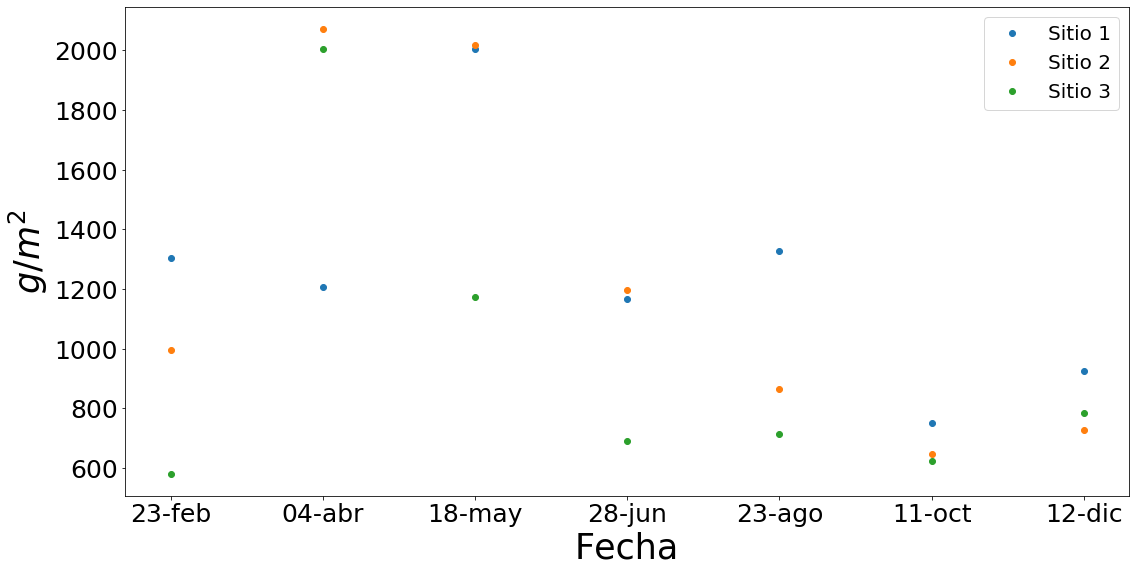

In [18]:
plt.figure(figsize=(18,9))
plt.plot(biomasa['Fecha'], biomasa['Sitio 1 V'], 'o')
plt.plot(biomasa['Fecha'], biomasa['Sitio 2 V'], 'o')
plt.plot(biomasa['Fecha'], biomasa['Sitio 3 V'], 'o')
metadata('Fecha', '$g/m^2$')
plt.legend(['Sitio 1', 'Sitio 2', 'Sitio 3'],
           fontsize = 20
          )

In [19]:
prom = (biomasa['Sitio 2 V'] + biomasa['Sitio 3 V']) /2
prom_2 = list(range(len(prom)))
for i in list(range(len(prom))):
    prom_2[i] = prom[i]/biomasa['Cantidad'][i]

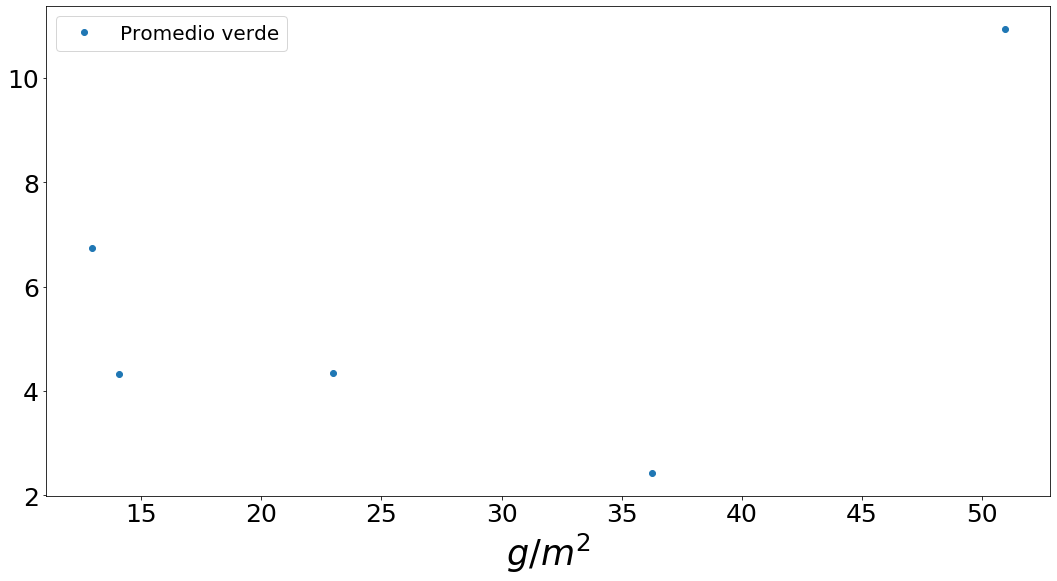

In [23]:
plt.figure(figsize=(18,9))
plt.plot(prom_2[1:-1], gpp_MOD[:-1], 'o')
metadata('$g/m^2$', '')
plt.legend(['Promedio verde'],
           fontsize = 20
          )

In [22]:
gpp_MOD

[10.945545051552205,
 2.419340827127335,
 4.3463256291070165,
 4.317597146793647,
 6.73216997872322,
 12.781529165647484]